Logs  
- [2025/03/06]   
  First version of the application of genetic algorithm to one-dimensional 
  optimization problem with Ackley's function.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as plt_cm

In [8]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

### Problem statement

$$
  \argmin_{x_1 \in [-5, 5]} 
    f(x_1) = -20 \exp \left( -0.2 \sqrt{x_1^2}\right)
      -\exp\left( \cos(2\pi x_1)\right) 
      + 20 + \exp(1)
$$

In [9]:
def obj_func(x, a=20, b=0.2, c=2.*np.pi):
  term1 = -a*np.exp(-b*np.sqrt(x**2))
  term2 = -np.exp(np.cos(c*x))
  return term1 + term2 + a + np.exp(1) 

The plot of function $f(x_1)$

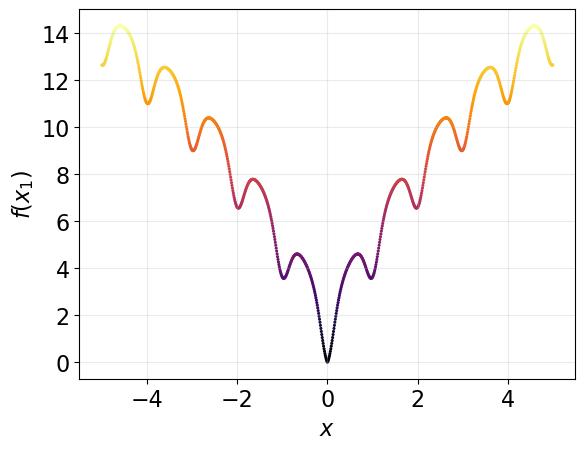

In [10]:
fig, ax = plt.subplots()

Nx = 1000
x_range = [-5., 5.]
x_space = np.linspace(x_range[0], x_range[1], Nx)
f_vals = obj_func(x_space)

ax.scatter(x_space, f_vals, 
            c=plt_cm.inferno(np.abs(f_vals)/np.max(np.abs(f_vals))), 
            edgecolor="none", s=5)

ax.set_xlabel("$x$")
ax.set_ylabel("$f(x_1)$")
ax.grid("on")

plt.show(fig)

### Running particle swarm optimization algorithm

In [15]:
seed = 25_03_06     # the underscore does not change the value, it is still an integer
rng = np.random.default_rng(seed)

N_sample = 5
x_range = [-5., 5.]
x_pso = rng.uniform(x_range[0], x_range[1], N_sample)
v_pso = np.zeros_like(x_pso)

G_max = 100
sf_max = 0.001      # standard deviation for fitness values

w = 0.5     # a weight for the contribution of the recent velocity
c1 = 0.3    # a weight for the contribution to the best movement for each particle
c2 = 0.3    # a weight for the contribution to the global best movement

hist_x_pso = np.zeros((1, N_sample))
hist_v_pso = np.zeros((1, N_sample))
hist_fitness_vals = np.zeros((1, N_sample))
hist_x_g_best = np.zeros((1))

fitness_vals = obj_func(x_pso)
idx_min_fitness = np.argmin(fitness_vals)
x_p_best = x_pso.copy()
x_g_best = x_pso[idx_min_fitness]
print(f"x_pso", x_pso)
print(f"fitness_vals", fitness_vals)
# print(f"x_g_best", x_g_best)

# -- store initial values
hist_x_pso[0] = x_pso.copy()
hist_v_pso[0] = v_pso.copy()
hist_fitness_vals[0] = fitness_vals.copy()
hist_x_g_best[0] = x_g_best
# print(f"hist_x_g_best", hist_x_g_best)

is_converged = False
for G in range(G_max):
  print(f" -- G: {G}")
  # -- get two random numbers
  r1 = rng.random(N_sample)
  r2 = rng.random(N_sample)

  # -- find the new velocities of the particles
  new_v_pso = w*v_pso + c1*r1*(x_p_best - x_pso) + c2*r2*(x_g_best - x_pso)
  # print(new_v_pso)

  # -- find the new positions of the particles
  new_x_pso = x_pso + v_pso
  # print(f"new_x_pso", new_x_pso)

  # if the new individual outside the domain, we set it to the boundary point
  # this is the constraint of our optimization
  # this constraint will sets the solution to be a point on the boundary
  for j in range(N_sample):
    if (new_x_pso[j] < x_range[0]):
      new_x_pso[j][0] = x_range[0]
    if (new_x_pso[j] > x_range[1]):
      new_x_pso[j][0] = x_range[1]

  # -- find new x_p_best and x_g_best
  # we can use indexing, but now we use the simplest way
  new_x_p_best = x_p_best.copy()
  new_fitness_vals = obj_func(new_x_pso)
  # print(f"new_fitness_vals", new_fitness_vals)
  for idx, (fitness_val, new_fitness_val) in enumerate(zip(fitness_vals, new_fitness_vals)):
    if fitness_val > new_fitness_val:
      # print(f"fitness_val, new_fitness_val", fitness_val, new_fitness_val)
      new_x_p_best[idx] = new_x_pso[idx]

  
  # -- calculate new fitness alues
  new_fitness_vals = obj_func(new_x_p_best)
  # print(new_fitness_vals)
  idx_min_fitness = np.argmin(new_fitness_vals)
  # print(idx_min_fitness)
  new_x_g_best = x_g_best
  if new_fitness_vals[idx_min_fitness] < np.min(fitness_vals):
    new_x_g_best = new_x_p_best[idx_min_fitness]
  print(f"new_x_g_best", new_x_g_best)

  hist_x_pso = np.append(hist_x_pso, [new_x_pso], axis=0)
  hist_v_pso = np.append(hist_v_pso, [new_v_pso], axis=0)
  hist_fitness_vals = np.append(hist_fitness_vals, [obj_func(new_x_pso)], axis=0)
  hist_x_g_best = np.append(hist_x_g_best, [new_x_g_best], axis=0)

  x_pso = new_x_pso.copy()
  v_pso = new_v_pso.copy()
  fitness_vals = new_fitness_vals.copy()
  x_p_best = new_x_p_best.copy()
  x_g_best = new_x_g_best

  # -- calculate std. dev. for convergence test
  sf_fitness = np.std(fitness_vals)

  if sf_fitness < sf_max:
    print(f"Converged at generation {G}")
    is_converged = True
    break


if not is_converged:

  print(f"Solution is not convergent")




x_pso [-3.08235841  1.43131473  4.67479661  4.96049197 -4.10092334]
fitness_vals [ 9.53666857  7.29377611 14.23187884 12.66610278 11.67325125]
 -- G: 0
new_x_g_best 1.4313147286924002
 -- G: 1
new_x_g_best 1.4313147286924002
 -- G: 2
new_x_g_best -1.2358008569387349
 -- G: 3
new_x_g_best -0.2329371686318713
 -- G: 4
new_x_g_best 0.1614930846884195
 -- G: 5
new_x_g_best 0.1405249278498955
 -- G: 6
new_x_g_best 0.1405249278498955
 -- G: 7
new_x_g_best 0.1405249278498955
 -- G: 8
new_x_g_best 0.1405249278498955
 -- G: 9
new_x_g_best -0.14014321019250617
 -- G: 10
new_x_g_best 0.05207136494050124
 -- G: 11
new_x_g_best 0.0016849245432675186
 -- G: 12
new_x_g_best 0.0016849245432675186
 -- G: 13
new_x_g_best 0.0016849245432675186
 -- G: 14
new_x_g_best 0.0016849245432675186
 -- G: 15
new_x_g_best 0.0016849245432675186
 -- G: 16
new_x_g_best 0.0016849245432675186
 -- G: 17
new_x_g_best 0.0016849245432675186
 -- G: 18
new_x_g_best 0.0016849245432675186
 -- G: 19
new_x_g_best 0.001684924543267

The history of fitness values

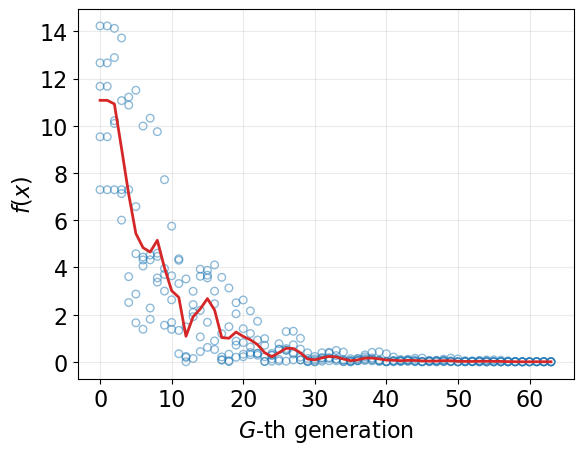

In [19]:
fig, ax = plt.subplots()

mean_fit_over_pop = []
for idx_hist in range(len(hist_x_pso)):
  x_pso_i = hist_x_pso[idx_hist]
  fit_vals = hist_fitness_vals[idx_hist]
  ax.scatter(np.ones_like(x_pso_i)*idx_hist, hist_fitness_vals[idx_hist], 
              color="tab:blue", facecolor="None", s=30, alpha=0.5)
  mean_fit = np.mean(fit_vals)
  mean_fit_over_pop = np.append(mean_fit_over_pop, [mean_fit])

# print(mean_fit_over_pop)
ax.plot(mean_fit_over_pop, color="tab:red", lw=2)

ax.set_xlabel("$G$-th generation")
ax.set_ylabel("$f(x)$")
ax.grid("on")

plt.show(fig)

Plot initial and the best solution 

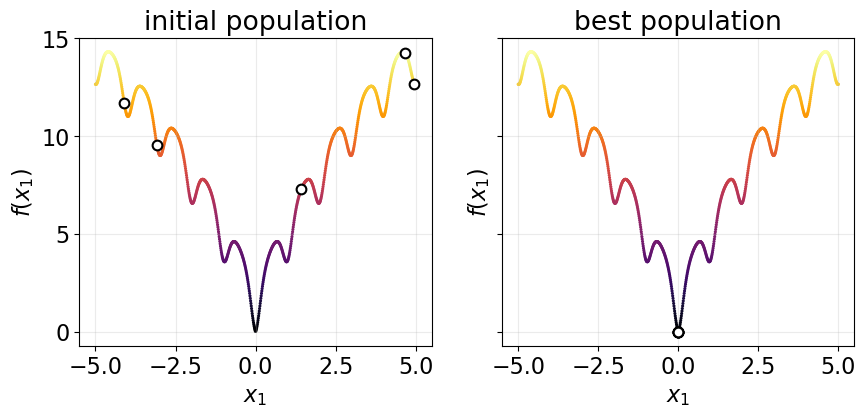

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

# -- left plot
Nx = 1000
x_range = [-5., 5.]
x_space = np.linspace(x_range[0], x_range[1], Nx)
f_vals = obj_func(x_space)

axes[0].scatter(x_space, f_vals, 
            c=plt_cm.inferno(np.abs(f_vals)/np.max(np.abs(f_vals))), 
            edgecolor="none", s=5)

for i, x_pso_i in enumerate(hist_x_pso[0]):
  f_x_pso_i = obj_func(x_pso_i)
  # print(f_x_ga_i)
  axes[0].plot([x_pso_i], [f_x_pso_i], color="k", linestyle="None", marker="o", 
    markerfacecolor="w", markeredgecolor="k", linewidth=3, markeredgewidth=1.5, 
    markersize=7)

axes[0].set_title("initial population")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$f(x_1)$")
axes[0].grid("on")

# -- right plot 
Nx = 1000
x_range = [-5., 5.]
x_space = np.linspace(x_range[0], x_range[1], Nx)
f_vals = obj_func(x_space)

axes[1].scatter(x_space, f_vals, 
            c=plt_cm.inferno(np.abs(f_vals)/np.max(np.abs(f_vals))), 
            edgecolor="none", s=5)

for i, x_pso_i in enumerate(hist_x_pso[-1]):
  f_x_pso_i = obj_func(x_pso_i)
  # print(f_x_pso_i)
  axes[-1].plot([x_pso_i], [f_x_pso_i], color="k", linestyle="None", marker="o", 
    markerfacecolor="w", markeredgecolor="k", linewidth=3, markeredgewidth=1.5, 
    markersize=7)

axes[-1].set_title("best population")
axes[-1].set_xlabel("$x_1$")
axes[-1].set_ylabel("$f(x_1)$")
axes[-1].grid("on")
plt.show(fig)